In [3]:
import numpy as np

def perceptrons(inputs, weights_list, thresholds_list):
    assert len(weights_list) == len(thresholds_list)

    results = []

    # Iterate through each set of weights and threshold
    for weights, threshold in zip(weights_list, thresholds_list):
        result = perceptron(inputs, weights, threshold)
        results.append(result)

    return results

# Original perceptron function
def perceptron(inputs, weights, threshold):
    assert len(inputs) == len(weights)

    # Multiply the inputs and weights
    values = np.multiply(inputs, weights)

    # Sum the results
    total = sum(values)

    # Decide if we should activate the perceptron
    if total < threshold:
        return 0
    else:
        return 1

# Example usage
inputs = [0.5, 0.7, 0.2]
weights_list = [[0.3, 0.4, 0.1], [0.5, -0.1, 0.8]]
thresholds_list = [0.4, 0.5]

output = perceptrons(inputs, weights_list, thresholds_list)
print(output)  # Output will be a list of 0s and 1s for each perceptron

[1, 0]


In [1]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Load iris dataset
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(int)  # 1 if Iris-Virginica, else 0
y = y.reshape([150, 1])

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Initialize weights and biases
        self.weights1 = np.random.randn(self.input_size, self.hidden_size) * 0.01
        self.weights2 = np.random.randn(self.hidden_size, self.output_size) * 0.01
        self.bias1 = np.zeros((1, self.hidden_size))
        self.bias2 = np.zeros((1, self.output_size))

    def fit(self, X, y, epochs=1000):
        for epoch in range(epochs):
            # Feedforward
            layer1 = X.dot(self.weights1) + self.bias1
            activation1 = sigmoid(layer1)
            layer2 = activation1.dot(self.weights2) + self.bias2
            activation2 = sigmoid(layer2)

            # Backpropagation
            error = activation2 - y
            d_weights2 = activation1.T.dot(error * sigmoid_derivative(layer2))
            d_bias2 = np.sum(error * sigmoid_derivative(layer2), axis=0, keepdims=True)

            error_hidden = error.dot(self.weights2.T) * sigmoid_derivative(layer1)
            d_weights1 = X.T.dot(error_hidden)
            d_bias1 = np.sum(error_hidden, axis=0, keepdims=True)

            # Update weights and biases
            self.weights2 -= self.learning_rate * d_weights2
            self.bias2 -= self.learning_rate * d_bias2
            self.weights1 -= self.learning_rate * d_weights1
            self.bias1 -= self.learning_rate * d_bias1

    def predict(self, X):
        layer1 = X.dot(self.weights1) + self.bias1
        activation1 = sigmoid(layer1)
        layer2 = activation1.dot(self.weights2) + self.bias2
        activation2 = sigmoid(layer2)
        return (activation2 > 0.5).astype(int)

# Create an instance of the MLP class
mlp = MLP(input_size=2, hidden_size=4, output_size=1)

# Train the MLP
mlp.fit(X, y)

# Make predictions
y_pred = mlp.predict(X)

# Evaluate accuracy
accuracy = np.mean(y_pred == y)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


```python
X = iris["data"][:, (2, 3)]  # petal length, petal width
```
- `iris["data"]`: This accesses the feature data from the Iris dataset.
- `[:, (2, 3)]`: This selects all rows (`:`) and the columns with indices 2 and 3, which correspond to the petal length and petal width respectively.
- So, `X` will contain only the petal length and petal width features for each sample in the dataset.

```python
y = (iris["target"] == 2).astype(int)  # 1 if Iris-Virginica, else 0
```
- `iris["target"]`: This accesses the target labels from the Iris dataset.
- `(iris["target"] == 2)`: This creates a boolean array where the value is `True` if the target is Iris-Virginica (label 2) and `False` otherwise.
- `.astype(int)`: This converts the boolean array to an integer array, where `True` becomes `1` and `False` becomes `0`.
- So, `y` will be an array of 1s and 0s, indicating whether each sample is Iris-Virginica or not.

```python
y = y.reshape([150,1])
```
- `y.reshape([150,1])`: This reshapes the `y` array to have 150 rows and 1 column.
- This is done to ensure that `y` is a column vector, which is a common format for target labels in machine learning tasks.


- `X` contains the petal length and petal width features of the Iris dataset.
- `y` contains binary labels: `1` for Iris-Virginica and `0` for other species.
- The reshaping of `y` is to ensure it's in the right shape for further computations in the neural network model.

The `sigmoid_derivative` function calculates the derivative of the sigmoid activation function, which is used during the backpropagation step in training neural networks.

The sigmoid function is defined as:
$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

The derivative of the sigmoid function with respect to \( z \) is:
$$  \sigma'(z) = \sigma(z) \times (1 - \sigma(z)) $$

Let's break down the `sigmoid_derivative` function:

```python
def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)
```

- `sigmoid(z)`: This computes the sigmoid activation function value for the input `z`.
- `(1 - sigmoid(z))`: This computes \( 1 - \sigma(z) \).
- `return s * (1 - s)`: This returns the derivative of the sigmoid function, which is the product of the sigmoid value `s` and \( 1 - \sigma(z) \).

This derivative is crucial during backpropagation because it helps in calculating the error gradient with respect to the network's weights. It quantifies how much the output of the sigmoid function changes concerning its input, which in turn, helps in updating the weights of the neural network during training.

This line of code creates an instance of the `MLP` class, which represents a Multi-layer Perceptron neural network. Let's break down the parameters passed to the constructor:

```python
mlp = MLP(input_size=2, hidden_size=4, output_size=1)
```

- `input_size=2`: This specifies the number of input features the neural network will accept. In this case, the neural network takes two features (petal length and petal width) as input.

- `hidden_size=4`: This specifies the number of neurons in the hidden layer of the neural network. The hidden layer is an intermediate layer between the input and output layers, where computations are performed to capture complex patterns in the data. Here, the hidden layer has 4 neurons.

- `output_size=1`: This specifies the number of neurons in the output layer of the neural network. Since this is a binary classification problem (distinguishing between Iris-Virginica and other species), the output layer has one neuron, which will produce an output between 0 and 1 (after passing through a sigmoid activation function), representing the probability of the input belonging to the Iris-Virginica class.

So, this line of code initializes an MLP with:
- 2 input neurons (for petal length and petal width)
- 4 neurons in the hidden layer
- 1 output neuron (for binary classification)

This `__init__` method is the constructor for the `MLP` (Multi-layer Perceptron) class. It initializes the neural network with specified input size, hidden layer size, output size, and learning rate. Let's break down each part of the method:

```python
def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
```
- This defines the constructor for the `MLP` class with four parameters:
  - `input_size`: Number of input features.
  - `hidden_size`: Number of neurons in the hidden layer.
  - `output_size`: Number of neurons in the output layer.
  - `learning_rate`: Learning rate for updating the weights during training. Default value is `0.01`.

```python
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.output_size = output_size
    self.learning_rate = learning_rate
```
- These lines assign the passed values of `input_size`, `hidden_size`, `output_size`, and `learning_rate` to instance variables so that they can be used throughout the class methods.

```python
    # initialize weights randomly
    self.weights1 = np.random.randn(self.input_size, self.hidden_size)
    self.weights2 = np.random.randn(self.hidden_size, self.output_size)
```
- These lines initialize the weights for the neural network layers:
  - `self.weights1`: Weights connecting the input layer to the hidden layer. Initialized with random values drawn from a normal distribution.
  - `self.weights2`: Weights connecting the hidden layer to the output layer. Also initialized with random values from a normal distribution.

```python
    # initialize biases to 0
    self.bias1 = np.zeros((1, self.hidden_size))
    self.bias2 = np.zeros((1, self.output_size))
```
- These lines initialize the biases for the neural network layers:
  - `self.bias1`: Biases for the hidden layer. Initialized as zeros.
  - `self.bias2`: Biases for the output layer. Also initialized as zeros.

the `__init__` method sets up the initial state of the `MLP` class by defining the architecture of the neural network (input, hidden, and output layers) and initializing the weights and biases with appropriate values.

This line of code initializes the weights for the connections between the input layer and the hidden layer of the neural network. Let's break it down:

```python
self.weights1 = np.random.randn(self.input_size, self.hidden_size)
```

- `np.random.randn`: This function generates an array of random numbers drawn from a standard normal distribution (mean=0, variance=1).
  
- `self.input_size, self.hidden_size`: These parameters define the shape of the weight matrix `self.weights1`.
  - `self.input_size`: Number of input neurons, which corresponds to the number of input features.
  - `self.hidden_size`: Number of neurons in the hidden layer.

- `self.weights1`: This is an instance variable that holds the weights between the input layer and the hidden layer.

The resulting `self.weights1` matrix will have dimensions `(input_size, hidden_size)`. Each element in this matrix represents the weight of a connection between an input neuron and a hidden neuron.

This initialization sets up the initial weights with random values, which will be updated during the training process to minimize the error of the neural network's predictions.

This block of code implements the feedforward process in the neural network, where the input data is passed through the network to produce an output.

```python
# feedforward
layer1 = X.dot(self.weights1) + self.bias1
```
- `X.dot(self.weights1)`: This performs matrix multiplication between the input data `X` and the weights `self.weights1`. The result is the weighted sum of inputs for each neuron in the hidden layer.
- `+ self.bias1`: This adds the biases `self.bias1` to the weighted sum.

```python
activation1 = sigmoid(layer1)
```
- `sigmoid(layer1)`: This applies the sigmoid activation function to the weighted sum obtained in `layer1`. The sigmoid function squashes the values between 0 and 1, introducing non-linearity to the network.

```python
layer2 = activation1.dot(self.weights2) + self.bias2
```
- `activation1.dot(self.weights2)`: This performs matrix multiplication between the activated values from `activation1` and the weights `self.weights2`. The result is the weighted sum of inputs for each neuron in the output layer.
- `+ self.bias2`: This adds the biases `self.bias2` to the weighted sum.

```python
activation2 = sigmoid(layer2)
```
- `sigmoid(layer2)`: This applies the sigmoid activation function to the weighted sum obtained in `layer2`. The output `activation2` represents the final output of the neural network after passing through the sigmoid activation function.

this block of code performs the following operations:
- Computes the weighted sums (`layer1` and `layer2`) for the hidden and output layers, respectively.
- Applies the sigmoid activation function to introduce non-linearity (`activation1` and `activation2`).
- Produces the final output of the neural network (`activation2`) after passing through the entire feedforward process.

Using the sigmoid activation function in both the hidden and output layers is a common choice, but it might not always be the optimal one depending on the problem you are solving.

### Sigmoid Activation Function

The sigmoid function squashes its input into a range between 0 and 1. It's useful for binary classification problems, like the one in your example where you're distinguishing between Iris-Virginica and other species.

### Hidden Layer

The sigmoid function introduces non-linearity to the model, allowing it to capture complex relationships in the data. For many tasks, including the Iris classification problem, using sigmoid in the hidden layer can work well.

### Output Layer

In your example, you're performing binary classification, so using a sigmoid activation function in the output layer makes sense. The sigmoid function can output probabilities that a given input belongs to a particular class.

### Alternatives to Sigmoid

- **ReLU (Rectified Linear Unit)**: ReLU and its variants are popular choices for the hidden layer in deep learning models. ReLU is computationally efficient and can help mitigate the vanishing gradient problem.
  
- **Softmax**: For multi-class classification problems, the softmax function is commonly used in the output layer. It can convert the raw scores (logits) into probabilities for each class.

### Considerations

- **Problem Type**: For binary classification tasks like the Iris dataset, sigmoid is often a good choice for the output layer.
  
- **Model Depth**: In deeper networks, using only sigmoid can lead to the vanishing gradient problem. In such cases, using ReLU or its variants can be beneficial.

- **Experimental Validation**: It's often a good practice to experiment with different activation functions to see which one performs best on your specific task.

while using sigmoid for both hidden and output layers can work well for certain tasks like binary classification, it's essential to consider the nature of the problem, model complexity, and experiment with different activation functions to find the optimal configuration for your specific problem.

For regression tasks, the choice of activation function in the output layer differs from classification tasks. Regression aims to predict continuous values, so the output layer usually does not apply a squashing function like the sigmoid or softmax, which are commonly used in classification tasks.

### Popular Activation Functions for Regression:

1. **Linear Activation Function (Identity Function)**
    - **Function**: \( f(x) = x \)
    - **Usage**: It directly outputs the weighted sum of inputs without applying any transformation. This is suitable for regression tasks where you want to predict continuous values.

2. **ReLU (Rectified Linear Unit)**
    - **Function**: \( f(x) = \max(0, x) \)
    - **Usage**: ReLU is commonly used in hidden layers of deep neural networks. However, it's not typically used in the output layer for regression tasks.

3. **Tanh (Hyperbolic Tangent)**
    - **Function**:  \( f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} \)
    - **Usage**: Tanh squashes the output to the range \([-1, 1]\). While not commonly used in the output layer for regression, it can be used in the hidden layers.

### No Activation (Linear Activation) for Regression

In many regression tasks, especially when using neural networks, the output layer often uses a linear activation function (or no activation function at all). This allows the network to output values in any range without being constrained by a specific function.

### Summary:

- **Output Layer for Regression**: Linear activation function (or no activation) is typically used in the output layer for regression tasks.
  
- **Hidden Layers**: ReLU, Tanh, and sigmoid (less common for regression) are popular choices for activation functions in the hidden layers, depending on the specific requirements and characteristics of the problem.

It's essential to experiment with different activation functions and architectures to determine the best approach for your specific regression task.

This block of code implements the backpropagation algorithm, which is crucial for training neural networks. Backpropagation involves calculating the gradient of the loss function with respect to the network's weights and biases. Let's break down each line:

```python
# backpropagation
error = activation2 - y
```
- `error`: This calculates the error between the predicted output `activation2` and the true labels `y`.

```python
d_weights2 = activation1.T.dot(error * sigmoid_derivative(layer2))
```
- `activation1.T`: Transpose of the activation values of the hidden layer.
- `error * sigmoid_derivative(layer2)`: Element-wise multiplication of the error and the derivative of the sigmoid activation applied to `layer2`.
- `activation1.T.dot(...)`: Calculates the gradient of the loss with respect to `weights2`.

```python
d_bias2 = np.sum(error * sigmoid_derivative(layer2), axis=0, keepdims=True)
```
- `np.sum(...)`: Computes the sum of the error multiplied by the derivative of the sigmoid function applied to `layer2`, across the rows (axis=0).
- `keepdims=True`: Ensures that the dimensions of `d_bias2` match those of the bias vector `self.bias2`.

```python
error_hidden = error.dot(self.weights2.T) * sigmoid_derivative(layer1)
```
- `error.dot(self.weights2.T)`: Computes the error propagated back from the output layer to the hidden layer by multiplying the error by the transpose of `weights2`.
- `sigmoid_derivative(layer1)`: Calculates the derivative of the sigmoid function applied to `layer1`.
- `error_hidden`: This represents the error associated with each neuron in the hidden layer.

```python
d_weights1 = X.T.dot(error_hidden)
```
- `X.T`: Transpose of the input data.
- `error_hidden`: The error propagated back to the hidden layer.
- `X.T.dot(...)`: Calculates the gradient of the loss with respect to `weights1`.

```python
d_bias1 = np.sum(error_hidden, axis=0, keepdims=True)
```
- `np.sum(...)`: Computes the sum of the `error_hidden` across the rows (axis=0).
- `keepdims=True`: Ensures that the dimensions of `d_bias1` match those of the bias vector `self.bias1`.

### Summary

- **Error Calculation**: The error between the predicted output and the true labels is computed.
  
- **Gradients Calculation**: The gradients of the loss function with respect to the weights and biases of both layers are computed using the error terms and the derivatives of the activation functions.

These gradients will be used to update the weights and biases of the neural network during the optimization step (e.g., using gradient descent or its variants) to minimize the loss function and improve the model's performance.

This block of code implements the update step in the backpropagation algorithm. After computing the gradients of the loss function with respect to the weights and biases, the network parameters (weights and biases) are updated to minimize the loss. Let's break down each line:

```python
# update weights and biases
self.weights2 -= self.learning_rate * d_weights2
```
- Update the weights of the second layer (`weights2`) by subtracting the product of the learning rate (`self.learning_rate`) and the gradient of the loss with respect to `weights2` (`d_weights2`).

```python
self.bias2 -= self.learning_rate * d_bias2
```
- Update the biases of the second layer (`bias2`) similarly using the gradient of the loss with respect to `bias2` (`d_bias2`).

```python
self.weights1 -= self.learning_rate * d_weights1
```
- Update the weights of the first layer (`weights1`) using the gradient of the loss with respect to `weights1` (`d_weights1`).

```python
self.bias1 -= self.learning_rate * d_bias1
```
- Update the biases of the first layer (`bias1`) using the gradient of the loss with respect to `bias1` (`d_bias1`).

### Summary

- **Learning Rate**: The `self.learning_rate` parameter controls the step size of the updates. A smaller learning rate makes the updates more conservative, while a larger learning rate can speed up convergence but may overshoot the optimal values.

- **Gradient Descent**: The updates are performed using a simple form of gradient descent, where the parameters are adjusted in the direction that minimizes the loss.

### Importance

- **Optimization**: This update step iteratively refines the network's parameters to minimize the loss function, improving the model's performance over time.
  
- **Convergence**: Proper tuning of the learning rate is crucial for convergence. If the learning rate is too high, the updates may oscillate or diverge. If it's too low, the training may be slow.

This iterative process of forward propagation, error calculation, and parameter updates continues for multiple epochs until the network's performance converges to a satisfactory level or reaches the maximum number of epochs specified.

The `predict` method in your code is used to make predictions using the trained neural network model. It performs the forward propagation through the network with the learned parameters (weights and biases) to generate predictions. Let's break down each line:

```python
def predict(self, X):
```
- This defines a method named `predict` that takes an input `X` (features) as an argument.

```python
layer1 = X.dot(self.weights1) + self.bias1
```
- Compute the weighted sum for the hidden layer (`layer1`) by multiplying the input `X` with the first set of weights (`self.weights1`) and adding the bias (`self.bias1`).

```python
activation1 = sigmoid(layer1)
```
- Apply the sigmoid activation function to the `layer1` to get the activated values (`activation1`) for the hidden layer.

```python
layer2 = activation1.dot(self.weights2) + self.bias2
```
- Compute the weighted sum for the output layer (`layer2`) by multiplying the activated values from the hidden layer (`activation1`) with the second set of weights (`self.weights2`) and adding the bias (`self.bias2`).

```python
activation2 = sigmoid(layer2)
```
- Apply the sigmoid activation function to `layer2` to get the final activated values (`activation2`) for the output layer. These values represent the predicted probabilities.

```python
return (activation2 > 0.5).astype(int)
```
- Convert the activated values in `activation2` to binary predictions:
  - If the activated value is greater than 0.5, the prediction is `True` (1).
  - If the activated value is less than or equal to 0.5, the prediction is `False` (0).
- `.astype(int)`: Convert the boolean values to integers (0 or 1) for easier interpretation.

### Summary

- **Forward Propagation**: The `predict` method performs forward propagation to generate predictions using the learned parameters of the neural network.
  
- **Sigmoid Activation**: The sigmoid activation function is used in both the hidden and output layers to introduce non-linearity and squash the outputs to the range [0, 1].

- **Binary Classification**: The final predictions are binary (0 or 1), suitable for binary classification tasks.

This method allows you to use the trained neural network to predict the classes of new input data (`X`) based on the learned patterns from the training data.

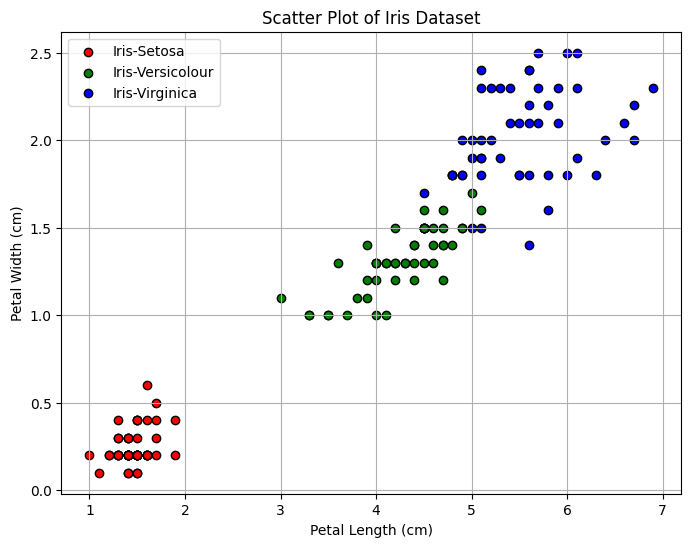

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Load iris dataset
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Iris-Setosa', c='r', edgecolors='k')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Iris-Versicolour', c='g', edgecolors='k')
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], label='Iris-Virginica', c='b', edgecolors='k')

# Plot formatting
plt.title('Scatter Plot of Iris Dataset')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.grid(True)
plt.show()


In this code:

- We load the Iris dataset.
- We extract the petal length and petal width features from the dataset.
- We use `plt.scatter` to create scatter plots for each species (`Iris-Setosa`, `Iris-Versicolour`, `Iris-Virginica`), color-coding them differently.
- We add labels, title, legend, and grid to make the plot informative and visually appealing.

this code displays a scatter plot showing the relationships between petal length and petal width for the three Iris species.

Accuracy: 1.00


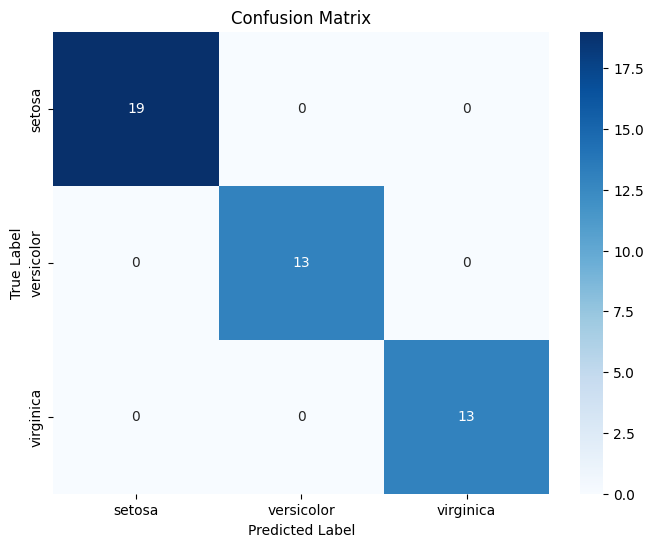

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets



# Load iris dataset
iris = datasets.load_iris()
X = iris["data"]
y = iris["target"]

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def relu(z):
    return np.maximum(0, z)

def softmax(z):
    exp_z = np.exp(z - np.max(z))
    return exp_z / exp_z.sum(axis=1, keepdims=True)

class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Initialize weights and biases
        self.weights1 = np.random.randn(self.input_size, self.hidden_size) * 0.01
        self.weights2 = np.random.randn(self.hidden_size, self.output_size) * 0.01
        self.bias1 = np.zeros((1, self.hidden_size))
        self.bias2 = np.zeros((1, self.output_size))

    def fit(self, X, y, epochs=1000):
        # Convert y to one-hot encoding
        y_one_hot = np.eye(self.output_size)[y]

        for epoch in range(epochs):
            # Feedforward
            layer1 = X.dot(self.weights1) + self.bias1
            activation1 = sigmoid(layer1)
            layer2 = activation1.dot(self.weights2) + self.bias2
            activation2 = softmax(layer2)

            # Backpropagation
            error = activation2 - y_one_hot
            d_weights2 = activation1.T.dot(error)
            d_bias2 = np.sum(error, axis=0, keepdims=True)

            error_hidden = error.dot(self.weights2.T) * activation1 * (1 - activation1)
            d_weights1 = X.T.dot(error_hidden)
            d_bias1 = np.sum(error_hidden, axis=0, keepdims=True)

            # Update weights and biases
            self.weights2 -= self.learning_rate * d_weights2
            self.bias2 -= self.learning_rate * d_bias2
            self.weights1 -= self.learning_rate * d_weights1
            self.bias1 -= self.learning_rate * d_bias1

    def predict(self, X):
        layer1 = X.dot(self.weights1) + self.bias1
        activation1 = sigmoid(layer1)
        layer2 = activation1.dot(self.weights2) + self.bias2
        activation2 = softmax(layer2)
        return np.argmax(activation2, axis=1)

# Create an instance of the MLP class
mlp = MLP(input_size=4, hidden_size=4, output_size=3)

# Train the MLP
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

# Evaluate accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.2f}")


from sklearn.metrics import confusion_matrix, classification_report


# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Display classification report
print(classification_report(y_test, y_pred, target_names=iris.target_names))


## Ref

- https://ml-2024.github.io/nn
- https://uw-madison-datascience.github.io/2022-10-26-machine-learning-novice-sklearn/06-neural-networks/index.html
- https://humphryscomputing.com/Notes/Neural/single.neural.html
- https://medium.com/@hirok4/building-a-multi-layer-perceptron-from-scratch-c9679752cf48
- https://pub.towardsai.net/the-multilayer-perceptron-built-and-implemented-from-scratch-70d6b30f1964
- https://abtinmy.github.io/CS-SBU-NeuralNetwork/lectures/introduction/MLP-Scratch-Iris
- https://towardsai.net/p/machine-learning/the-multilayer-perceptron-built-and-implemented-from-scratch
- https://towardsai.net/p/machine-learning/main-types-of-neural-networks-and-its-applications-tutorial-734480d7ec8e
- https://python.plainenglish.io/building-the-foundations-a-step-by-step-guide-to-implementing-multi-layer-perceptrons-in-python-51ebd9d7ecbe
- https://jalammar.github.io/feedforward-neural-networks-visual-interactive/
- https://jalammar.github.io/visual-interactive-guide-basics-neural-networks/
- https://mlu-explain.github.io/neural-networks/
- deep-learning-from-scratch
  - https://learning.oreilly.com/library/view/deep-learning-from/9781492041405/
  - https://github.com/SethHWeidman/DLFS_code/tree/master